In [12]:
# 비 유무 예측 주제로 R을 이용한 로지스틱 회귀분석을 실시하고, 인공신경망을 
# 이용한 로지스틱 회귀분석을 python으로 실행하여 결과를 비교한다.
library(car)
library(caret)
library(ModelMetrics)
library(corrplot)
df<-read.csv("E:/GoogleDrive/DATASET/dataset4/weather.csv")

In [13]:
####EDA
head(df)
str(df)
summary(df)

Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
2014-11-01,8.0,24.3,0.0,6.3,NW,30,NW,20,29,1015.0,7,23.6,No,Yes
2014-11-02,14.0,26.9,3.6,9.7,ENE,39,W,17,36,1008.4,3,25.7,Yes,Yes
2014-11-03,13.7,23.4,3.6,3.3,NW,85,NNE,6,69,1007.2,7,20.2,Yes,Yes
2014-11-04,13.3,15.5,39.8,9.1,NW,54,W,24,56,1007.0,7,14.1,Yes,Yes
2014-11-05,7.6,16.1,2.8,10.6,SSE,50,ESE,28,49,1018.5,7,15.4,Yes,No
2014-11-06,6.2,16.9,0.0,8.2,SE,44,E,24,57,1021.7,5,14.8,No,No


'data.frame':	366 obs. of  15 variables:
 $ Date         : Factor w/ 366 levels "2014-11-01","2014-11-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ MinTemp      : num  8 14 13.7 13.3 7.6 6.2 6.1 8.3 8.8 8.4 ...
 $ MaxTemp      : num  24.3 26.9 23.4 15.5 16.1 16.9 18.2 17 19.5 22.8 ...
 $ Rainfall     : num  0 3.6 3.6 39.8 2.8 0 0.2 0 0 16.2 ...
 $ Sunshine     : num  6.3 9.7 3.3 9.1 10.6 8.2 8.4 4.6 4.1 7.7 ...
 $ WindGustDir  : Factor w/ 16 levels "E","ENE","ESE",..: 8 2 8 8 11 10 10 1 9 1 ...
 $ WindGustSpeed: int  30 39 85 54 50 44 43 41 48 31 ...
 $ WindDir      : Factor w/ 16 levels "E","ENE","ESE",..: 8 14 6 14 3 1 3 1 2 3 ...
 $ WindSpeed    : int  20 17 6 24 28 24 26 24 17 6 ...
 $ Humidity     : int  29 36 69 56 49 57 47 57 48 32 ...
 $ Pressure     : num  1015 1008 1007 1007 1018 ...
 $ Cloud        : int  7 3 7 7 7 5 6 7 7 1 ...
 $ Temp         : num  23.6 25.7 20.2 14.1 15.4 14.8 17.3 15.5 18.9 21.7 ...
 $ RainToday    : Factor w/ 2 levels "No","Yes": 1 2 2 2 2 1 1 1 1 2 ...
 $ RainT

         Date        MinTemp          MaxTemp         Rainfall     
 2014-11-01:  1   Min.   :-5.300   Min.   : 7.60   Min.   : 0.000  
 2014-11-02:  1   1st Qu.: 2.300   1st Qu.:15.03   1st Qu.: 0.000  
 2014-11-03:  1   Median : 7.450   Median :19.65   Median : 0.000  
 2014-11-04:  1   Mean   : 7.266   Mean   :20.55   Mean   : 1.428  
 2014-11-05:  1   3rd Qu.:12.500   3rd Qu.:25.50   3rd Qu.: 0.200  
 2014-11-06:  1   Max.   :20.900   Max.   :35.80   Max.   :39.800  
 (Other)   :360                                                    
    Sunshine       WindGustDir  WindGustSpeed      WindDir      WindSpeed    
 Min.   : 0.000   NW     : 73   Min.   :13.00   NW     : 61   Min.   : 0.00  
 1st Qu.: 5.950   NNW    : 44   1st Qu.:31.00   WNW    : 61   1st Qu.:11.00  
 Median : 8.600   E      : 37   Median :39.00   NNW    : 47   Median :17.00  
 Mean   : 7.909   WNW    : 35   Mean   :39.84   N      : 30   Mean   :17.99  
 3rd Qu.:10.500   ENE    : 30   3rd Qu.:46.00   ESE    : 27   3rd 

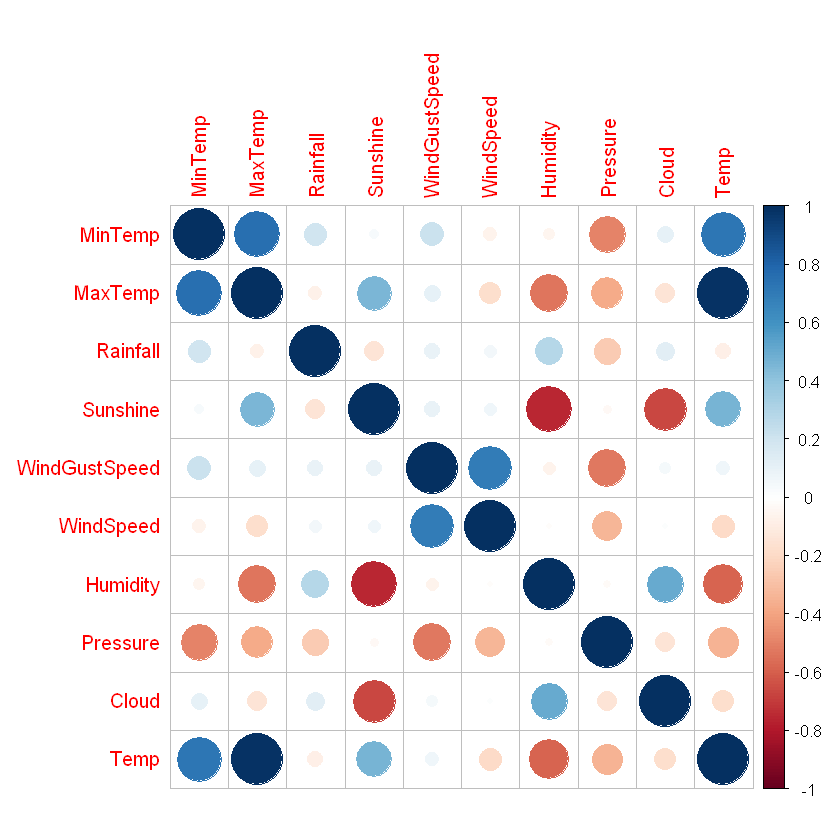

In [14]:
df<-na.omit(df) #결측치 제거
cordf<-df[sapply(df,is.numeric)]  #numeric컬럼만 cordf에 넣기
M <- cor(cordf)
corrplot(M, method="circle")
#Temp와minTemp, maxTemp 상관관계가 매우 크다. 다중공선성 가능성 큼

######결측치 제거, 전처리
df<-df[,-1] #날짜 제거
df<-na.omit(df) #결측치 제거
p<-preProcess(df,"range") #모든 숫자형변수 범위0~1 최소-최대 정규화
df<-predict(p,df)

In [15]:
#모델 생성후 다중 공선성 문제로 다시 전처리 부분
df<-df[,-c(1,2,5,7)]


In [16]:
####모델생성
library(SyncRNG)
v <- 1:nrow(df)
s <- SyncRNG(seed=42)
idx <- s$shuffle(v)[1:round(nrow(df)*0.7)]

# idx[1:length(idx)]
# train <- df[idx,]
# test <- df[-idx,]
# 
# idx<-createDataPartition(df$RainTomorrow,p=0.7,list=T)

train<-df[idx,]
test<-df[-idx,]
m_glm<-glm(RainTomorrow~.,train,family = 'binomial')
####Warning message:
####glm.fit: 적합된 확률값들이 0 또는 1 입니다 
### 원인 다중공선성
### 다중공선성 변수 제거해야함
sqrt(vif(m_glm))>3
summary(m_glm)

Rainfall      Sunshine WindGustSpeed     WindSpeed      Humidity 
        FALSE         FALSE         FALSE         FALSE         FALSE 
     Pressure         Cloud          Temp     RainToday 
        FALSE         FALSE         FALSE         FALSE


Call:
glm(formula = RainTomorrow ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9774  -0.4656  -0.2279  -0.1173   2.4642  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -4.0734     2.5778  -1.580  0.11406   
Rainfall       -3.3405     3.7113  -0.900  0.36808   
Sunshine       -3.0154     1.4298  -2.109  0.03495 * 
WindGustSpeed   5.4564     2.1170   2.577  0.00995 **
WindSpeed      -2.0006     1.8013  -1.111  0.26673   
Humidity        5.2860     1.9534   2.706  0.00681 **
Pressure       -3.5811     1.7172  -2.085  0.03703 * 
Cloud           1.0632     0.9382   1.133  0.25713   
Temp            3.8686     1.5236   2.539  0.01111 * 
RainTodayYes    0.1337     0.7670   0.174  0.86161   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.09  on 250  degrees of freedom
Residual deviance: 140.

In [17]:
######유의한 변수 선택
#후진제거법으로 로지스틱회귀모형을 새롭게 정의
m_glm=step(m_glm, direction = "backward")

summary(m_glm)

Start:  AIC=160.69
RainTomorrow ~ Rainfall + Sunshine + WindGustSpeed + WindSpeed + 
    Humidity + Pressure + Cloud + Temp + RainToday

                Df Deviance    AIC
- RainToday      1   140.72 158.72
- Rainfall       1   141.46 159.46
- WindSpeed      1   141.94 159.94
- Cloud          1   141.99 159.99
<none>               140.69 160.69
- Sunshine       1   145.26 163.26
- Pressure       1   145.41 163.41
- Temp           1   147.62 165.62
- WindGustSpeed  1   148.03 166.03
- Humidity       1   148.99 166.99

Step:  AIC=158.72
RainTomorrow ~ Rainfall + Sunshine + WindGustSpeed + WindSpeed + 
    Humidity + Pressure + Cloud + Temp

                Df Deviance    AIC
- Rainfall       1   141.78 157.78
- Cloud          1   141.99 157.99
- WindSpeed      1   142.07 158.07
<none>               140.72 158.72
- Sunshine       1   145.31 161.31
- Pressure       1   145.58 161.58
- Temp           1   147.68 163.68
- WindGustSpeed  1   148.30 164.30
- Humidity       1   149.25 165.25

St


Call:
glm(formula = RainTomorrow ~ Sunshine + WindGustSpeed + Humidity + 
    Pressure + Temp, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1154  -0.4475  -0.2514  -0.1278   2.4817  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.731      2.324  -1.605 0.108395    
Sunshine        -4.086      1.216  -3.360 0.000779 ***
WindGustSpeed    4.210      1.673   2.517 0.011829 *  
Humidity         4.909      1.791   2.741 0.006121 ** 
Pressure        -2.942      1.590  -1.850 0.064317 .  
Temp             4.594      1.419   3.237 0.001206 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.09  on 250  degrees of freedom
Residual deviance: 144.59  on 245  degrees of freedom
AIC: 156.59

Number of Fisher Scoring iterations: 6


In [18]:
#모델 재생성
p_glm<-predict(m_glm,test,type='response')
p.glm<-ifelse(p_glm>=0.5,'Yes','No')

In [20]:
#################################모델평가###########################
# table(test$RainTomorrow)
# table(p.glm)

caret::confusionMatrix(as.factor(p.glm),test$RainTomorrow)
caret::confusionMatrix(as.factor(p.glm),test$RainTomorrow)$byClass
caret::confusionMatrix(as.factor(p.glm),test$RainTomorrow)$overall
auc(as.factor(p.glm),test$RainTomorrow)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  83   8
       Yes  6  11
                                          
               Accuracy : 0.8704          
                 95% CI : (0.7921, 0.9273)
    No Information Rate : 0.8241          
    P-Value [Acc > NIR] : 0.1256          
                                          
                  Kappa : 0.5336          
                                          
 Mcnemar's Test P-Value : 0.7893          
                                          
            Sensitivity : 0.9326          
            Specificity : 0.5789          
         Pos Pred Value : 0.9121          
         Neg Pred Value : 0.6471          
             Prevalence : 0.8241          
         Detection Rate : 0.7685          
   Detection Prevalence : 0.8426          
      Balanced Accuracy : 0.7558          
                                          
       'Positive' Class : No              
                                 

Sensitivity          Specificity       Pos Pred Value 
           0.9325843            0.5789474            0.9120879 
      Neg Pred Value            Precision               Recall 
           0.6470588            0.9120879            0.9325843 
                  F1           Prevalence       Detection Rate 
           0.9222222            0.8240741            0.7685185 
Detection Prevalence    Balanced Accuracy 
           0.8425926            0.7557658

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.8703704      0.5336212      0.7920762      0.9272814      0.8240741 
AccuracyPValue  McnemarPValue 
     0.1255833      0.7892680

[1] 0.7795734

Warning message:
"package 'ROCR' was built under R version 3.6.3"

,OR,2.5%,97.5%,p
(Intercept),0.02,0.00,2.00,0.108
Sunshine,0.02,0.00,0.18,0.001
WindGustSpeed,67.38,2.74,2056.76,0.012
Humidity,135.51,4.82,5646.67,0.006
Pressure,0.05,0.00,1.10,0.064
Temp,98.88,6.83,1852.63,0.001


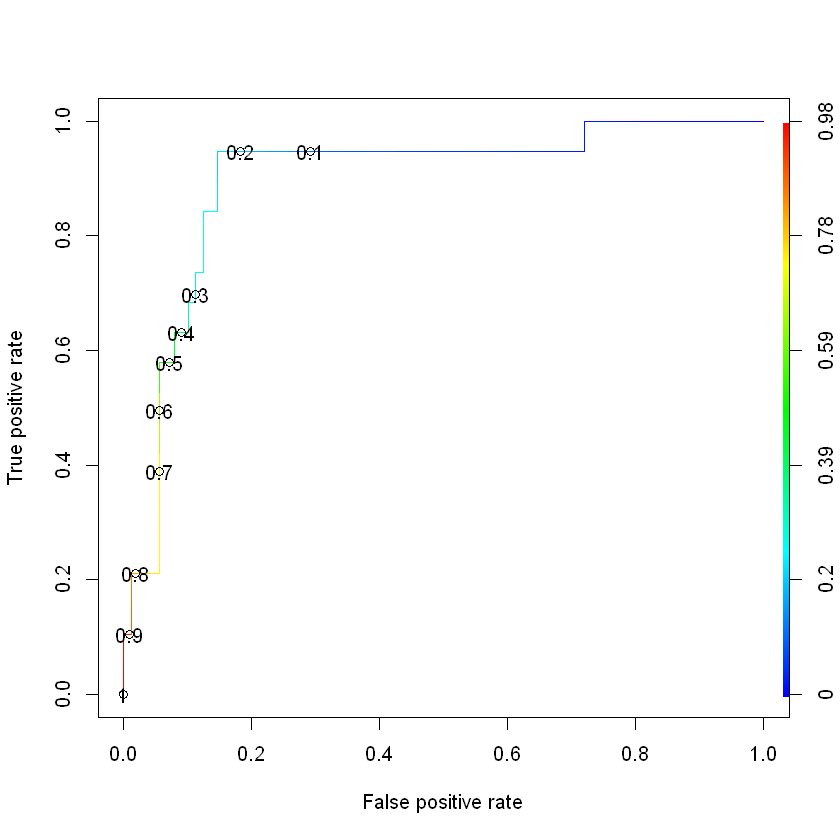

In [21]:
####################시각화##################################
#ROC 곡선 그리기
library(ROCR)
ROCR_p_glm <- prediction(p_glm,list(test$RainTomorrow))
ROCR_pf_glm <- performance(ROCR_p_glm,'tpr','fpr')
plot(ROCR_pf_glm,colorize=TRUE,print.cutoffs.at=seq(0.1,by=0.1))
# TPR을 높이고 FPR을 줄이는 임계값을 찾아 선택할 수 있다.

#독립변수들의 Odds ratio 구하기
ORtable=function(x,digits=2){
  suppressMessages(a<-confint(x))
  result=data.frame(exp(coef(x)),exp(a))
  result=round(result,digits)
  result=cbind(result,round(summary(x)$coefficient[,4],3))   #Pr(>|z|)
  colnames(result)=c("OR","2.5%","97.5%","p")
  result
}
ORtable(m_glm)